In [1]:
#ライブラリのインポート
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plot
import time
import os
os.environ['TF_KERAS'] = '1'

2023-06-22 06:48:33.010439: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-22 06:48:34.057394: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-22 06:48:34.057480: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-06-22 06:48:34.057490: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like t

In [2]:
#主要ライブラリのバージョンの確認
tensorflow.__version__
print(tensorflow.__version__)
keras.__version__
print(keras.__version__)

2.11.0
2.11.0


In [3]:
#手書き文字データ (学習用、テスト用) の読み込み
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
#手書き文字データの確認
len(x_train)

x_train[0:10]

x_train[0]

len(x_test)

len(y_test)

10000

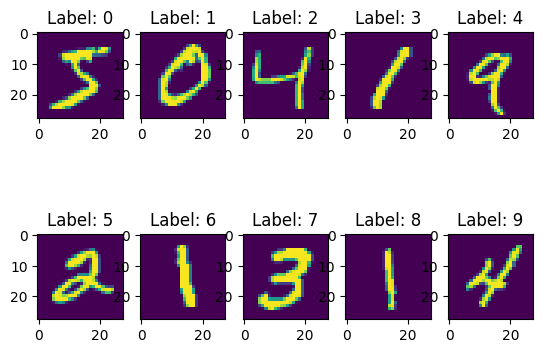

In [5]:
#学習用データを10だけ描画
for index in range(10):
    plot.subplot(2, 5, index + 1)
    plot.title("Label: " + str(index))
    plot.imshow(x_train[index].reshape(28, 28), cmap = None)

In [6]:
#0～255のデータを0.0～1.0の範囲に変換
max_value = 255
x_train, x_test = x_train / max_value, x_test / max_value

#変換後のデータを確認
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
#ディープ ラーニングの各レイヤーを設定したモデルを作成
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512),
    keras.layers.Activation('relu'),
    keras.layers.Dense(512),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10),
    keras.layers.Activation('softmax')
])

2023-06-22 06:48:36.767851: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-06-22 06:48:36.767908: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (computing20230622): /proc/driver/nvidia/version does not exist
2023-06-22 06:48:36.769561: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
#モデルをコンパイル
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


In [9]:
#モデルを訓練
model.fit(x_train, y_train, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1904 - accuracy: 0.9432
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0850 - accuracy: 0.9740
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0592 - accuracy: 0.9818
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0430 - accuracy: 0.9865
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0391 - accuracy: 0.9880
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/st

In [10]:
#モデルの評価
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1358 - accuracy: 0.9834


[0.1357751041650772, 0.9833999872207642]

In [11]:
#テスト データの確認
y_test[0:10]

x_test[0:10]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

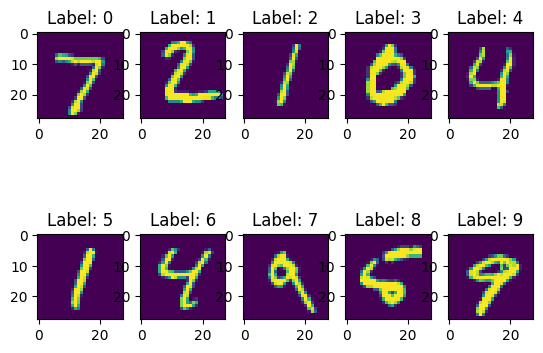

In [12]:
#テスト データを10だけ描画
for index in range(10):
    plot.subplot(2, 5, index + 1)
    plot.title("Label: " + str(index))
    plot.imshow(x_test[index].reshape(28, 28), cmap = None)

In [13]:
#予想の結果
predict_results = model.predict(x_test[0:10])
predict_results

predict_result_list = list(map(lambda result: result.argmax(), predict_results))
predict_result_list

1/1 [==============================] - 0s 80ms/step


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [14]:
#モデルの概要の確認
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

In [15]:
#モデル保存用のフォルダーのパス
saved_model_path = "./saved_models/{}".format(int(time.time()))
saved_model_path

'./saved_models/1687416721'

In [16]:
#モデルを TensorFlow のフォーマットで保存する
tensorflow.keras.models.save_model(model, saved_model_path, save_format="tf")

INFO:tensorflow:Assets written to: ./saved_models/1687416721/assets


INFO:tensorflow:Assets written to: ./saved_models/1687416721/assets


In [17]:
#モデルを Keras のフォーマットで保存する
model.save(saved_model_path + '/mnist_model.h5')